In [1]:
import torch 
import utils
import os
import cv2 as cv
import random
from dataset import NoisyDataset
from torch.utils.data import DataLoader

In [2]:

dataset = NoisyDataset("./dataset/original", (0,10), batchSize=32)
dataloader = DataLoader(dataset=dataset, batch_size=None, shuffle=True)

In [6]:
input, groundT = dataset.__getitem__(10)

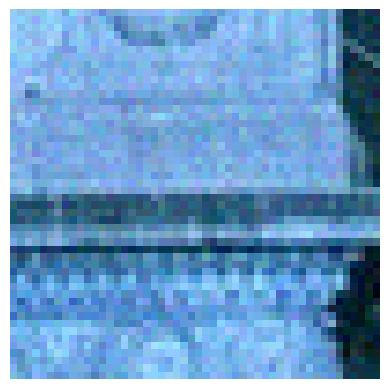

In [7]:
utils.plot_image(input[5])

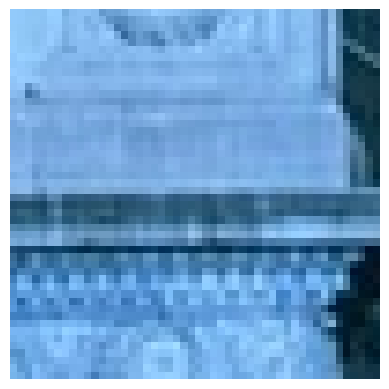

In [8]:
utils.plot_image(groundT[5])

In [35]:
x = [torch.rand((3, 50 ,50)), torch.rand((3, 50 ,50))]
y = torch.rand(3,50, 50)


batchTensor = torch.stack(x, 0)

batchTensor.shape

torch.Size([2, 3, 50, 50])

In [2]:
"""
Pre-processing pipeline : Images are read into numpy array using open cv. The resulting shape of such array is ( H , W, C). The data type of
this array is np.uint8

The images are then converted to torch tensor with floating point precision. Each tensor is then scaled by 255, so that each pixel now is in
the range [0,1]

To the scaled tensor is then applied noise sampled from a normal distribution with standard deviation ranging from [0,55]

Finally, two lists of images are created, once contained ground truth images and the other one contiaing noisy images

"""

listOfImage = os.listdir("dataset/original/")
cleanImages = []
noisyImages = []

for pathImage in listOfImage:

    npImage  = cv.imread("dataset/original/" + pathImage)
    torchImage = torch.from_numpy(npImage).float()  # initial shape (180, 180, 3)

    torchImage = torchImage.permute(2,0,1) / 255 # scaling the tensor
    cleanImages.append(torchImage)
    noisy_image = utils.applyRandomNoise(torchImage, stdRange = (0,55))
    noisyImages.append(noisy_image)

79  vertical pixels to pad
19  horizontal pixels to pad
 we should pad left side, before padding the shape is torch.Size([3, 321, 481])
after paddding is torch.Size([3, 321, 500])


tensor([[[0.2097, 0.2290, 0.2412,  ..., 0.3043, 0.2988, 0.3347],
         [0.2323, 0.2211, 0.2465,  ..., 0.2897, 0.3230, 0.3092],
         [0.2325, 0.2619, 0.2804,  ..., 0.3404, 0.3175, 0.3731],
         ...,
         [0.2446, 0.3409, 0.3279,  ..., 0.3236, 0.3880, 0.3375],
         [0.2993, 0.3229, 0.2761,  ..., 0.3682, 0.3439, 0.3459],
         [0.3163, 0.3005, 0.3289,  ..., 0.3458, 0.3588, 0.3121]],

        [[0.2495, 0.3068, 0.2408,  ..., 0.3751, 0.3828, 0.3573],
         [0.2681, 0.2906, 0.2560,  ..., 0.3946, 0.3607, 0.4337],
         [0.2339, 0.2698, 0.2623,  ..., 0.3770, 0.4011, 0.3624],
         ...,
         [0.3771, 0.3811, 0.3618,  ..., 0.3619, 0.4175, 0.4015],
         [0.3644, 0.3592, 0.3616,  ..., 0.4502, 0.4031, 0.4143],
         [0.3532, 0.3590, 0.3724,  ..., 0.4377, 0.4199, 0.4578]],

        [[0.1198, 0.1167, 0.1606,  ..., 0.2896, 0.2969, 0.2744],
         [0.1090, 0.1681, 0.1655,  ..., 0.3449, 0.2877, 0.2811],
         [0.1267, 0.1809, 0.1720,  ..., 0.3073, 0.3093, 0.

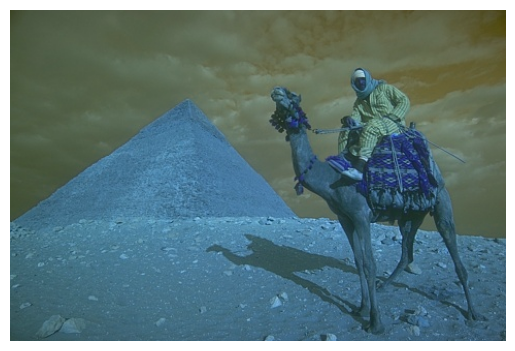

In [27]:
utils.plot_image(cleanImages[4])

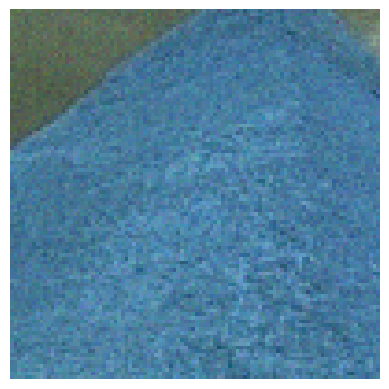

In [26]:
utils.plot_image(patches[5])